In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv('appliance_energy.csv')

# Display the first few rows to understand the structure
df.head()


,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


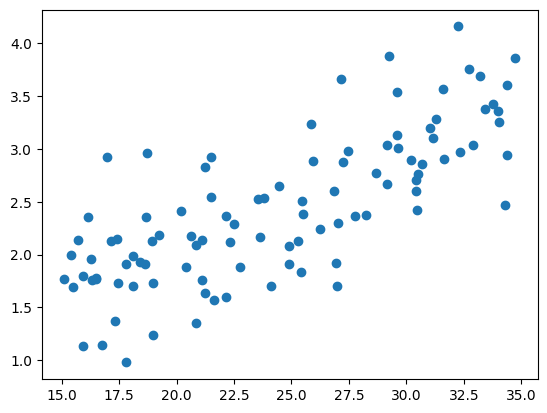

In [ ]:
plt.scatter(df['Temperature (°C)'],df['Energy Consumption (kWh)'])
plt.show()

In [ ]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [ ]:
# Check for missing values
print(df.isnull().sum())
#df = df.dropna()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [ ]:
# Features (independent variable) and target (dependent variable)
# Independent variable (Temperature)
X = df[['Temperature (°C)']]
# Dependent variable (Energy Consumption)
y = df['Energy Consumption (kWh)']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.head()

,Temperature (°C)
83,16.271167
53,32.896547
70,30.444895
45,28.250446
44,20.175600


In [ ]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Slope: ", model.coef_)
print("y-intercept: ", model.intercept_)

Slope:  [0.08996618]
y-intercept:  0.22196391661907633


In [ ]:
#y = mx + c

print(model.coef_*22.49 + model.intercept_)

[2.24530337]


In [ ]:
2.25-2.29

-0.040000000000000036

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-Squared value
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

Mean Squared Error: 0.16342487842925055
R-Squared: 0.6119478445218713


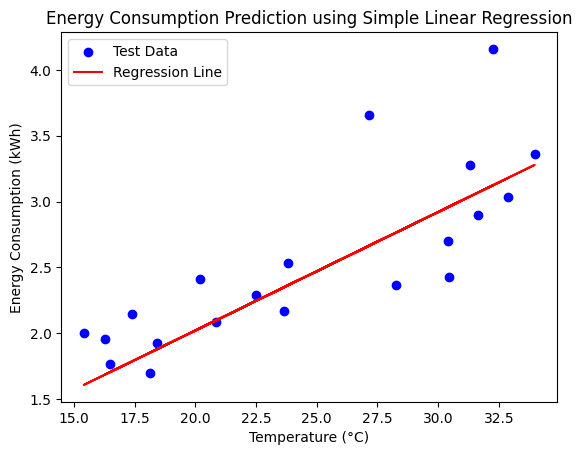

In [ ]:
# Plot the test data and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')  # Actual data
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [ ]:
import joblib #deployment
# Save the model to a file
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [ ]:
# Load the model from the file
model = joblib.load('appliance_energy_model.pkl')

In [ ]:
temp = np.array([[22.49]])

In [ ]:
# energy prediction
prediction = model.predict(temp)
print("Predicted energy consumption:", prediction)

Predicted energy consumption: [2.24530337]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
